# Clasicos Musicales desde 1923 a 2023

### Géneros musicales más populares por decada

Carga de la información 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.4.1'
import rpy2.robjects as ro

In [3]:
#CARGAMOS LA INFORMACIÓN   
classics = pd.read_csv('C:\\Users\\Rodrigo\\Documents\\Bootcamp AI\\Git\\Ejercicios_Curso_ML\\Datasets\\ClassicHit.csv')
classics.head()

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,NaN,0.1500,0.604,132.015,40,Alt.-Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,NaN,0.1230,0.494,117.913,47,Alt.-Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


#### Exploración de la infromación

In [4]:
#Exploramos los tipso de campos
classics.dtypes

Track                object
Artist               object
Year                  int64
Duration              int64
Time_Signature        int64
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Popularity            int64
Genre                object
dtype: object

In [5]:
#información del dataframe
classics.info

<bound method DataFrame.info of                                 Track          Artist  Year  Duration  \
0                    Hey Jack Kerouac  10,000 Maniacs  1987    206413   
1                    Like the Weather  10,000 Maniacs  1987    236653   
2             What's the Matter Here?  10,000 Maniacs  1987    291173   
3                          Trouble Me  10,000 Maniacs  1989    193560   
4               Candy Everybody Wants  10,000 Maniacs  1992    185960   
...                               ...             ...   ...       ...   
15145  7 Seconds (feat. Neneh Cherry)  Youssou N'Dour  1994    306226   
15146                          Birima  Youssou N'Dour  1995    228373   
15147                             Set  Youssou N'Dour  2004    226826   
15148                Africa Remembers  Youssou N'Dour  2007    560466   
15149                       Wiri-Wiri  Youssou N'Dour  2007    247466   

       Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0         

In [6]:
#Buscamos valor nulos
classics.isnull().sum()

#Valores nulos en campos Instrumentalness y Danceability, lo volvemos cero paro los analisis posteriores
classics['Instrumentalness'] = classics.Instrumentalness.fillna(0)
classics['Danceability'] = classics.Danceability.fillna(0)

classics.isnull().sum()

Track               0
Artist              0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Genre               0
dtype: int64

In [7]:
#Para mayor facilidad, pasamos lo nombres de los campos a minúsculas
classics.rename(columns= {
    "Track":"track",
    "Artist":"artist",
    "Year":"year",
    "Duration":"duration",
    "Time_Signature":"time_signature",
    "Danceability":"danceability",
    "Energy":"energy",
    "Key":"key",
    "Loudness":"loudness",
    "Mode":"mode",
    "Speechiness":"speechiness",
    "Acousticness":"acousticness",
    "Instrumentalness":"instrumentalness",
    "Liveness":"liveness",
    "Valence":"valence",
    "Tempo":"tempo",
    "Popularity":"popularity",
    "Genre":"genre"
    },inplace=True)

classics.head()

,track,artist,year,duration,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt.-Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt.-Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [8]:
#Explorando generos, vemos que Alt. Rock y Pop tiene variaciones, por lo que unificamos en un mismo valor
classics.genre.unique()

array(['Alt.-Rock', 'Alt. Rock', 'Alt.Rock', 'Blues', 'Country', 'Disco',
       'EDM', 'Folk', 'Funk', 'Gospel', 'Jazz', 'Metal', 'Pop', 'POP',
       'Punk', 'R&B', 'Rap', 'Reggae', 'Rock', 'SKA', 'Today', 'World'],
      dtype=object)

In [9]:
classics['genre'] = classics['genre'].str.upper() #Generos a mayúscula
classics['genre'] = classics['genre'].replace(['ALT.-ROCK', 'ALT.ROCK'], 'ALT. ROCK') #Unificando Alt. Rock
classics.genre.unique()

array(['ALT. ROCK', 'BLUES', 'COUNTRY', 'DISCO', 'EDM', 'FOLK', 'FUNK',
       'GOSPEL', 'JAZZ', 'METAL', 'POP', 'PUNK', 'R&B', 'RAP', 'REGGAE',
       'ROCK', 'SKA', 'TODAY', 'WORLD'], dtype=object)

In [10]:
#Para análisis que se planean efectuar en un futuro, encuentra la década de un año, por ejemplo una canción de 1987, pertenece a la década de los 1980
classics['decada'] = (classics['year'] // 10) * 10
classics.head()

,track,artist,year,duration,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,genre,decada
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,ALT. ROCK,1980
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,ALT. ROCK,1980
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,ALT. ROCK,1980
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,ALT. ROCK,1980
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,ALT. ROCK,1990


In [11]:
#Popularity es un campo con una escala del 1 al 100 para saber qué tan popular es una canción 
print(classics.popularity.max())
print(classics.popularity.min())
print(classics.energy.max())
print(classics.energy.min())

98
0
0.999
9.77e-05


In [12]:
#Conteo de canciones por género
classics.genre.value_counts()

genre
POP          3669
METAL         922
COUNTRY       833
R&B           822
ROCK          799
ALT. ROCK     780
JAZZ          778
PUNK          754
RAP           718
EDM           700
BLUES         683
DISCO         652
TODAY         620
FOLK          575
REGGAE        439
FUNK          388
SKA           381
WORLD         326
GOSPEL        311
Name: count, dtype: int64

In [13]:
#Promedio de popularidad por género
classics.groupby(by=['genre']).popularity.mean().sort_values(ascending=False)

genre
TODAY        66.985484
ALT. ROCK    56.900000
RAP          56.735376
POP          53.840829
METAL        47.767896
EDM          47.727143
R&B          43.221411
COUNTRY      37.979592
REGGAE       36.018223
FUNK         34.886598
PUNK         34.173740
SKA          33.795276
GOSPEL       32.221865
DISCO        30.343558
JAZZ         29.384319
FOLK         28.633043
WORLD        28.346626
ROCK         24.856070
BLUES        24.614934
Name: popularity, dtype: float64

In [14]:
#Explorando el género Today, para saber qué tipo de canciones son, al parecer son canciones POP actuales
today = classics[ classics['genre'] == 'TODAY']
today.head(10)

,track,artist,year,duration,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,genre,decada
14204,Break Free,Ariana Grande,2014,214840,4,0.686,0.702,7,-5.325,0,0.0455,0.00637,0.000045,0.2040,0.290,129.948,76,TODAY,2010
14205,One Last Time,Ariana Grande,2014,197266,4,0.628,0.593,8,-5.036,1,0.0323,0.09300,0.000002,0.0960,0.104,125.025,82,TODAY,2010
14206,Dangerous Woman,Ariana Grande,2016,235946,3,0.664,0.602,4,-5.369,0,0.0412,0.05290,0.000000,0.3560,0.289,134.049,70,TODAY,2010
14207,Into You,Ariana Grande,2016,244453,4,0.623,0.734,9,-5.948,1,0.1070,0.01620,0.000002,0.1450,0.370,107.853,71,TODAY,2010
14208,Side To Side,Ariana Grande,2017,226160,4,0.649,0.736,6,-5.840,0,0.2300,0.05280,0.000000,0.2350,0.612,159.182,66,TODAY,2010
14209,God is a woman,Ariana Grande,2018,197546,4,0.602,0.658,1,-5.934,1,0.0558,0.02330,0.000060,0.2370,0.268,145.031,75,TODAY,2010
14210,no tears left to cry,Ariana Grande,2018,205920,4,0.699,0.713,9,-5.507,0,0.0594,0.04000,0.000003,0.2940,0.354,121.993,75,TODAY,2010
14211,7 rings,Ariana Grande,2019,178626,4,0.780,0.321,1,-10.747,0,0.3720,0.56200,0.000000,0.0881,0.315,139.961,50,TODAY,2010
14212,"thank u,next",Ariana Grande,2019,207320,4,0.720,0.654,1,-5.634,1,0.0647,0.22700,0.000000,0.1010,0.411,106.976,78,TODAY,2010
14213,positions,Ariana Grande,2020,172324,4,0.737,0.802,0,-4.771,1,0.0878,0.46800,0.000000,0.0931,0.682,144.015,79,TODAY,2020


In [15]:
#Promedio de popularidad por Artista
classics.groupby(by=['artist']).popularity.mean().sort_values(ascending=False).head(20)

artist
Tierra                               92.0
Ronny & the Daytonas                 92.0
Barenaked Ladies                     91.0
Suzi Quatro & Chris Norman           90.0
Skylark                              90.0
a-ha                                 88.0
Martha & the Vandellas               88.0
Jon B. featuring Babyface            87.0
SWV and Puff Daddy                   87.0
Brandy and Monica                    86.0
Carly Simon & James Taylor           86.0
Keith Sweat featuring Athena Cage    86.0
Inez & Charlie Foxx                  86.0
Faith Evans featuring Puff Daddy     86.0
Smash Mouth                          86.0
Frankie Avalon                       85.0
Kris Kristofferson                   85.0
The Alan Parsons Project             85.0
Dionne Farris                        85.0
Maxwell                              85.0
Name: popularity, dtype: float64

### Analisis y visualización

Importo clases para visualización de R

In [16]:
# Importar los módulos necesarios
import pandas as pd
from rpy2.robjects.lib import grdevices
from IPython.display import Image
from rpy2.robjects import pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects.lib.ggplot2 import ggplot, aes, geom_bar, labs, theme_minimal
from rpy2.robjects.vectors import DataFrame

# Importar ggplot2 en R
ggplot2 = importr('ggplot2')

# Habilitar la conversión automática de pandas a R
pandas2ri.activate()

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(
c:\Users\Rodrigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\rpy2\robjects\lib\ggplot2.py:70: UserWarning: This was designed against ggplot2 versions starting with 3.3. but you have 3.5.1
  warnings.warn(


Cuales son los artistas más populares por década

In [17]:
#se encuentran el top 5 de artistas más populares para cierta década

artistas_decada_popularidad = classics.groupby(['artist', 'decada']).popularity.mean().reset_index()
top_artistas_decada = []

decadas = artistas_decada_popularidad['decada'].unique()

for decada in decadas:
    artistas_decade = artistas_decada_popularidad[artistas_decada_popularidad['decada'] == decada]
    top_5_artistas = artistas_decade.nlargest(5, 'popularity')
    top_artistas_decada.append(top_5_artistas)

top_5_artistas_x_decada = pd.concat(top_artistas_decada)

print(top_5_artistas_x_decada[top_5_artistas_x_decada['decada'] == 1980])

                         artist  decada  popularity
4094                     Tierra    1980        92.0
810           Climax Blues Band    1980        88.0
4362                       a-ha    1980        88.0
3623   The Alan Parsons Project    1980        85.0
2587  Mick Jagger & David Bowie    1980        84.0


                    artist decada popularity
1253                Eminem   2000   80.71429
2201             Lady Gaga   2000   80.00000
3086 Red Hot Chili Peppers   2000   79.75000
2282           Linkin Park   2000   78.11111
2084            Kanye West   2000   77.66667



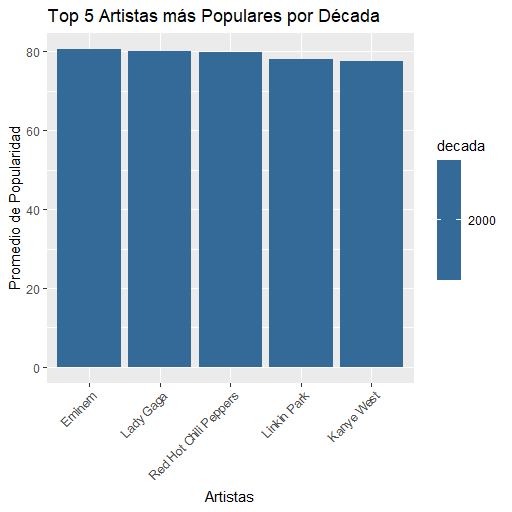

In [22]:
#Graficamos el top de artistas para una década dada
decada = 2000

set_grafico = top_5_artistas_x_decada[top_5_artistas_x_decada['decada'] == decada]

#se transforma dataframe a R
rdf = pandas2ri.py2rpy(set_grafico)
print(rdf)

#se guarda en ambiente global
ro.globalenv['top_5_artistas_decada_grafica'] = rdf

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plots_ej3\\plot_artistas_x_decada.png", width=512, height=512, res=100)

codigo_r = """
library(ggplot2)

# Crear el gráfico en ggplot
gp <- ggplot(top_5_artistas_decada_grafica, aes(x = reorder(artist, -popularity), y = popularity, fill = decada)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 5 Artistas más Populares por Década",
       x = "Artistas",
       y = "Promedio de Popularidad") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

# Devolver el gráfico
  print(gp)
"""
# Ejecutar el código de R para crear el gráfico
ro.r(codigo_r)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

display(Image(filename='plots_ej3/plot_artistas_x_decada.png'))


##### Evolución de un artista en específico

busqueda de artistas

In [23]:
buscar_comienza_por = 'M'

df_artistas = pd.DataFrame(classics.artist.unique(), columns=['artist'])
df_artistas[df_artistas['artist'] .str.startswith(buscar_comienza_por)].head(20)

,artist
35,Modest Mouse
36,Muse
38,My Chemical Romance
158,Ma Rainey
159,Magic Sam
160,Magic Slim
161,Memphis Minnie
162,Memphis Slim
163,Mississippi Fred McDowell
164,Mississippi John Hurt


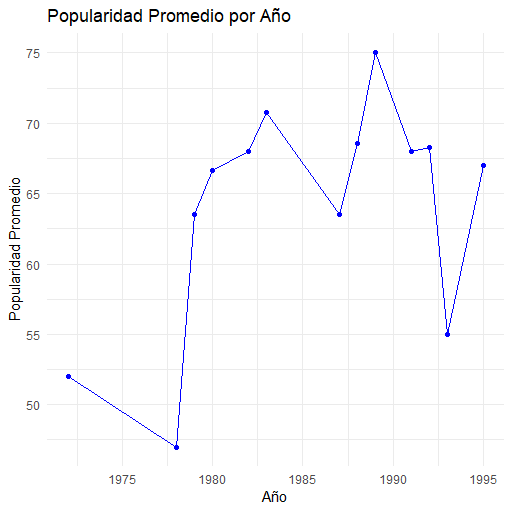

In [25]:
#Filtramos por artista y graficamos su popularidad a traves de los años
artista = 'Michael Jackson'
archivo = "plots_ej3\\popularidad_artista_" + artista + ".png"

canciones_artista = classics[classics['artist'] == artista]
popularidad_artista = canciones_artista.groupby(['year']).popularity.mean().reset_index().sort_values(by='popularity', ascending=False)

#se transforma dataframe a R
rdf = pandas2ri.py2rpy(popularidad_artista)

#se guarda en ambiente global
ro.globalenv['popularidad_artista'] = rdf

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file=archivo, width=512, height=512, res=100)

codigo_r = """
library(ggplot2)

# Crear el gráfico en ggplot
gp <- ggplot(popularidad_artista, aes(x = year, y = popularity)) +
  geom_line(color = "blue") +  # Añadir la línea
  geom_point(color = "blue") +  # Opcional: añadir puntos en la línea
  labs(title = "Popularidad Promedio por Año",
       x = "Año",
       y = "Popularidad Promedio") +
  theme_minimal()  # Aplicar un tema minimalista
  

# Devolver el gráfico
  print(gp)
"""
# Ejecutar el código de R para crear el gráfico
ro.r(codigo_r)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

display(Image(filename=archivo))


##### Cuales son los géneros más populares en el set de datos

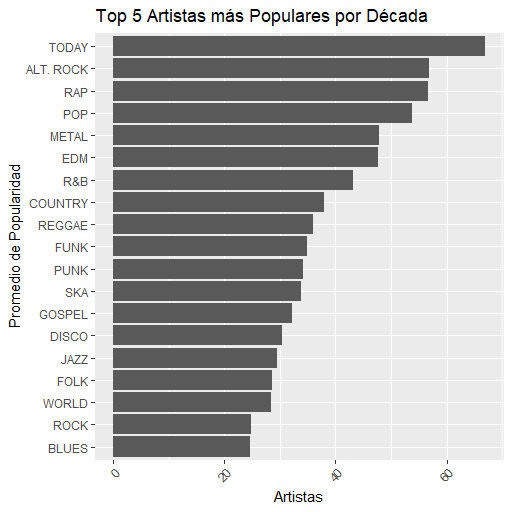

In [30]:
popularidad_por_genero = classics.groupby('genre').popularity.mean().reset_index().sort_values(by='popularity', ascending=False)

#se transforma dataframe a R
rdf = pandas2ri.py2rpy(popularidad_por_genero)

#se guarda en ambiente global
ro.globalenv['popularidad_por_genero'] = rdf

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plots_ej3\\popularidad_x_genero.png", width=512, height=512, res=100)

codigo_r = """
library(ggplot2)

# Crear el gráfico en ggplot
gp <- ggplot(popularidad_por_genero, aes(x = popularity, y = reorder(genre, +popularity))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 5 Artistas más Populares por Década",
       x = "Artistas",
       y = "Promedio de Popularidad") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

# Devolver el gráfico
  print(gp)
"""
# Ejecutar el código de R para crear el gráfico
ro.r(codigo_r)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

display(Image(filename='plots_ej3/popularidad_x_genero.png'))



Con esta gráfica podemos observar, en toda la historia que tenemos del set de datos, cuáles han sido los generos con un promedio de popularidad más alto.

##### Evolución de los géneros a través de los años

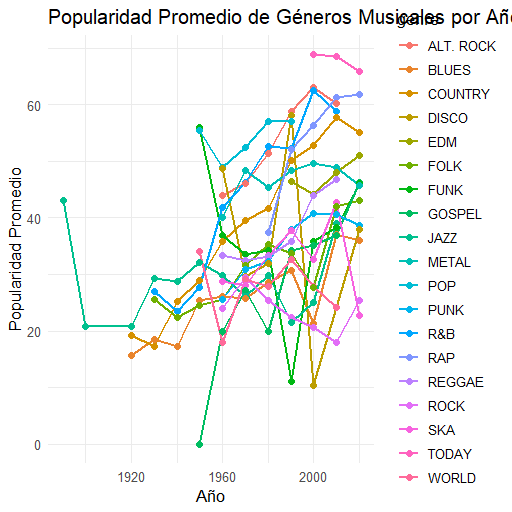

In [32]:
popularidad_por_decada_y_genero = classics.groupby(['decada', 'genre']).popularity.mean().reset_index().sort_values(by='popularity', ascending=False)
#se transforma dataframe a R
rdf = pandas2ri.py2rpy(popularidad_por_decada_y_genero)

#se guarda en ambiente global
ro.globalenv['popularidad_por_decada_y_genero'] = rdf

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plots_ej3\\popularidad_x_genero_x_decada.png", width=512, height=512, res=100)

codigo_r = """
library(ggplot2)

# Crear el gráfico en ggplot
gp <- ggplot(popularidad_por_decada_y_genero, aes(x = decada, y = popularity, color = genre)) +
  geom_line(size = 1) +  # Añadir líneas
  geom_point(size = 2) +  # Opcional: añadir puntos en la línea
  labs(title = "Popularidad Promedio de Géneros Musicales por Año",
       x = "Año",
       y = "Popularidad Promedio") +
  theme_minimal() +
  theme(text = element_text(size = 12)) 

# Devolver el gráfico
  print(gp)
"""
# Ejecutar el código de R para crear el gráfico
ro.r(codigo_r)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

display(Image(filename='plots_ej3/popularidad_x_genero_x_decada.png'))

La evolución de los generos en el gráfico general, se mira un poco desordenado y no se entiende mucho, filtremos algunas géneros

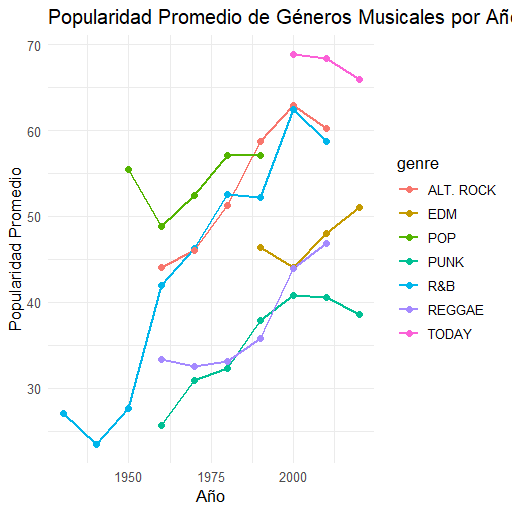

In [34]:
generos_a_graficar = ['ALT. ROCK', 'POP', 'EDM', 'R&B', 'PUNK', 'TODAY','REGGAE']

popularidad_por_decada_y_genero = classics.groupby(['decada', 'genre']).popularity.mean().reset_index().sort_values(by='popularity', ascending=False)

datos_filtrados =  popularidad_por_decada_y_genero[popularidad_por_decada_y_genero['genre'].isin(generos_a_graficar)]

#se transforma dataframe a R
rdf = pandas2ri.py2rpy(datos_filtrados)

#se guarda en ambiente global
ro.globalenv['popularidad_por_decada_y_genero_filter'] = rdf

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plots_ej3\\popularidad_por_decada_y_genero_filter.png", width=512, height=512, res=100)

codigo_r = """
library(ggplot2)

# Crear el gráfico en ggplot
gp <- ggplot(popularidad_por_decada_y_genero_filter, aes(x = decada, y = popularity, color = genre)) +
  geom_line(size = 1) +  # Añadir líneas
  geom_point(size = 2) +  # Opcional: añadir puntos en la línea
  labs(title = "Popularidad Promedio de Géneros Musicales por Año",
       x = "Año",
       y = "Popularidad Promedio") +
  theme_minimal() +
  theme(text = element_text(size = 12)) 

# Devolver el gráfico
  print(gp)
"""
# Ejecutar el código de R para crear el gráfico
ro.r(codigo_r)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

display(Image(filename='plots_ej3/popularidad_por_decada_y_genero_filter.png'))


Aquí podemos observar varios puntos interesantes, cómo las décadas en que o nace el género o empieza a ser más popular, así como la evolución que ha tenido durante los años, por ejemplo podemos ver que el Punk nacio alrededor de la decada de los 60, teniendo su máxima popularidad en la decada de los 2000. Otra observación interesante es cómo el R&B ha tenido un aumento en su popularidad desde la decada de 1940 a la fecha.

#### Distribución de la popularidad de los géneros seleccionados

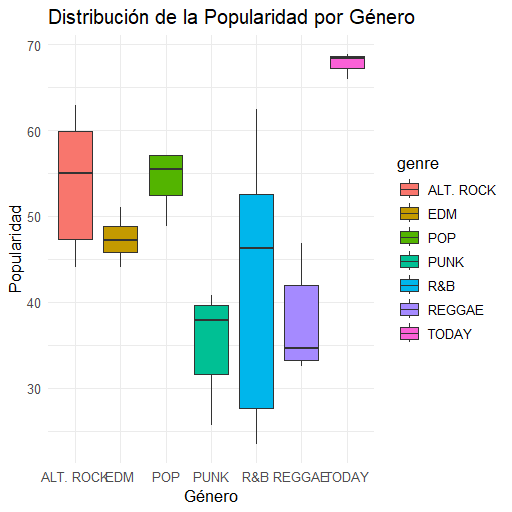

In [37]:

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plots_ej3\\popularidad_por_decada_y_genero_filter.png", width=512, height=512, res=100)

codigo_r = """
library(ggplot2)

# Crear el gráfico en ggplot
gp <- ggplot(popularidad_por_decada_y_genero_filter, aes(x = genre, y = popularity, fill = genre)) +
  geom_boxplot() +
  labs(title = "Distribución de la Popularidad por Género",
       x = "Género",
       y = "Popularidad") +
  theme_minimal() +
  theme(text = element_text(size = 12)) 


# Devolver el gráfico
  print(gp)
"""
# Ejecutar el código de R para crear el gráfico
ro.r(codigo_r)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

display(Image(filename='plots_ej3/popularidad_por_decada_y_genero_filter.png'))

aquí podemos ver algunos temas interesantes, por ejemplo, el género Today, que es una mezcla entre el pop moderno y latin pop, con artistas como Ariana Grande, Bad Bunny, etc. es el género con la caja más estrecha, lo que quiere decir que es el género con menos canciones en la lista, pero a su vez es el género con más popularidad, teniendo una media de popularidad de arriba de 75; Y está el caso del género Punk y Reggae, que son los géneros de menos popularidad, con medias abajo del 40. El género R&B tiene la mayor variabilidad, lo que indica que dentro de este género existen tanto éxitos muy populares como canciones con menor impacto.

##### Qué hace popular una canción

In [47]:
classics.rename(columns= {
    "danceability":"danzabilidad",
    "energy":"energia",
    "acousticness":"acustica",
    "instrumentalness":"instrumentabilidad",
    "valence":"vividez"
    },inplace=True)

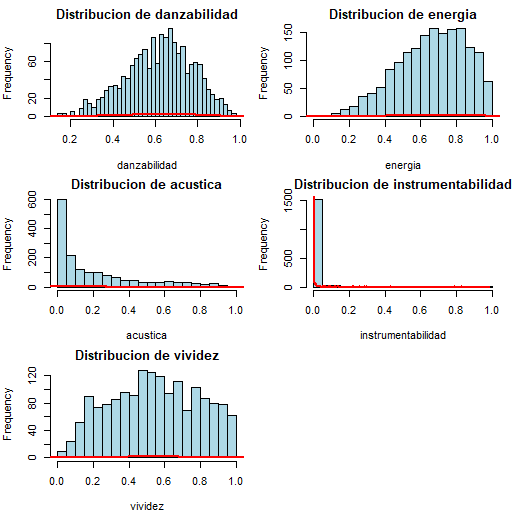

In [48]:
sns.set(style='whitegrid')

df_populares = classics[classics['popularity'] >= 70]

#paso de set y features
rdf = pandas2ri.py2rpy(df_populares)

ro.globalenv['df_populares'] = rdf

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plots_ej3\\features.png", width=512, height=512, res=100)

codigo_r = """
library(ggplot2)

# Configurar la ventana gráfica para mostrar múltiples gráficos
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))

features <- c('danzabilidad', 'energia', 'acustica', 'instrumentabilidad', 'vividez')

# Crear los histogramas para cada característica
for (feature in features) {
  hist(df_populares[[feature]], 
       main = paste("Distribucion de", feature),
       xlab = feature,
       col = "lightblue", 
       border = "black", 
       breaks = 30)
  
  # Añadir la densidad (KDE) al histograma
  dens <- density(df_populares[[feature]], na.rm = TRUE)
  lines(dens, col = "red", lwd = 2)
}
"""
# Ejecutar el código de R para crear el gráfico
ro.r(codigo_r)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

display(Image(filename='plots_ej3/features.png'))



Aquí podemos observar al distribución de diferentes factores de las canciones más populares (con popularidad arriba del 70), si nos enfocamos en al media, podría decirse que las canciones más populares son: las que tienden a ser más movidas para bailar y con una energía alta; definitivamente las canciones acusticas e instrumentales no son muy populares; la vividez se refiere a qué tan alegra es la canción en sus letras, una alta vividez suelen ser canciones que hablan de sentimientos felices y una baja vividez hablan de sentimientos trsites, con este gráfico se podría decir, que las canciones más populares suelen tener un equilibro entre sentimientos felices y trsites.

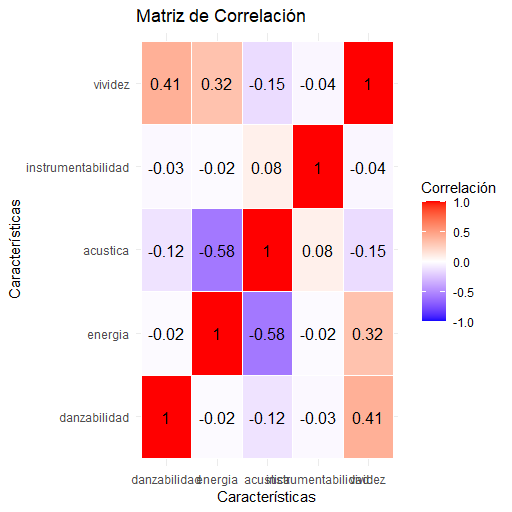

In [60]:
df_populares = classics[classics['popularity'] >= 70]

#paso de set y features
rdf = pandas2ri.py2rpy(df_populares)

ro.globalenv['df_populares'] = rdf

df_populares.head()

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plots_ej3\\correlacion.png", width=512, height=512, res=100)

codigo_r = """
library(ggplot2)
library(reshape2)  

features <- c('danzabilidad', 'energia', 'acustica', 'instrumentabilidad', 'vividez')

# Calcular la matriz de correlación
correlation <- cor(df_populares[, features], use = "complete.obs")

# Usar melt para convertir la matriz en un formato largo adecuado para ggplot2
correlation_melt <- melt(correlation)

# Crear el heatmap con ggplot2
gp <- ggplot(data = correlation_melt, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +  # Crear las celdas del heatmap
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name = "Correlación") +  # Colores personalizados
  theme_minimal() +  # Aplicar un tema limpio
  labs(title = "Matriz de Correlación", x = "Características", y = "Características") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4)  # Añadir etiquetas de texto

print(gp)
"""
# Ejecutar el código de R para crear el gráfico
ro.r(codigo_r)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

display(Image(filename='plots_ej3/correlacion.png'))

En este gráfico podemos observar correlaciones bastante interesantes, por ejempplo, las canciones bailables suelen tener una correlación con la letra de la canción, aunque no del todo, por lo que una canción bailable no necesariamente siempre tendrá canciones alegres (algunas salsas son buen ejemplo de esto), por otro lado, las canciones acústicas son las menos enérgicas, suelen ser las canciones más tranquilas con tempos más despacios.